# t-SNE Visualization of MNIST in Torch7
Adapted from the manifold t-sne demo.
Install manifold package using:
luarocks install manifold

In [1]:
m = require 'manifold';

In [3]:
N = 2000
mnist = require 'mnist';
testset = mnist.testdataset()
testset
testset.size  = N
testset.data  = testset.data[{{1,N}}]
testset.label = testset.label[{{1,N}}]
testset
x = torch.DoubleTensor(testset.data:size()):copy(testset.data)
x:resize(x:size(1), x:size(2) * x:size(3))
labels = testset.label
x:size()
ndims - t-SNE map of 2-dimensions

perplexity - a learning parameter (usually between 5 and 50)

use_bh - Whether to use the Barnes-Hut condition described here

pca - t-SNE may not be fast enough for very high dimensions so we first reduce the number of dimensions to something 
that can be handled by t-SNE. This dimensionality reduction is done by your favorite DR algorithm PCA.

theta - theta of the barnes-hut condition, described in Barnes-Hut t-SNE paper.
opts = {ndims = 2, perplexity = 30, pca = 50, use_bh = true, theta=0.5}
mapped_x1 = m.embedding.tsne(x, opts)
mapped_x1:size()

In [14]:
im_size = 4096
map_im = m.draw_image_map(mapped_x1, x:resize(x:size(1), 1, 28, 28), im_size, 0, true)

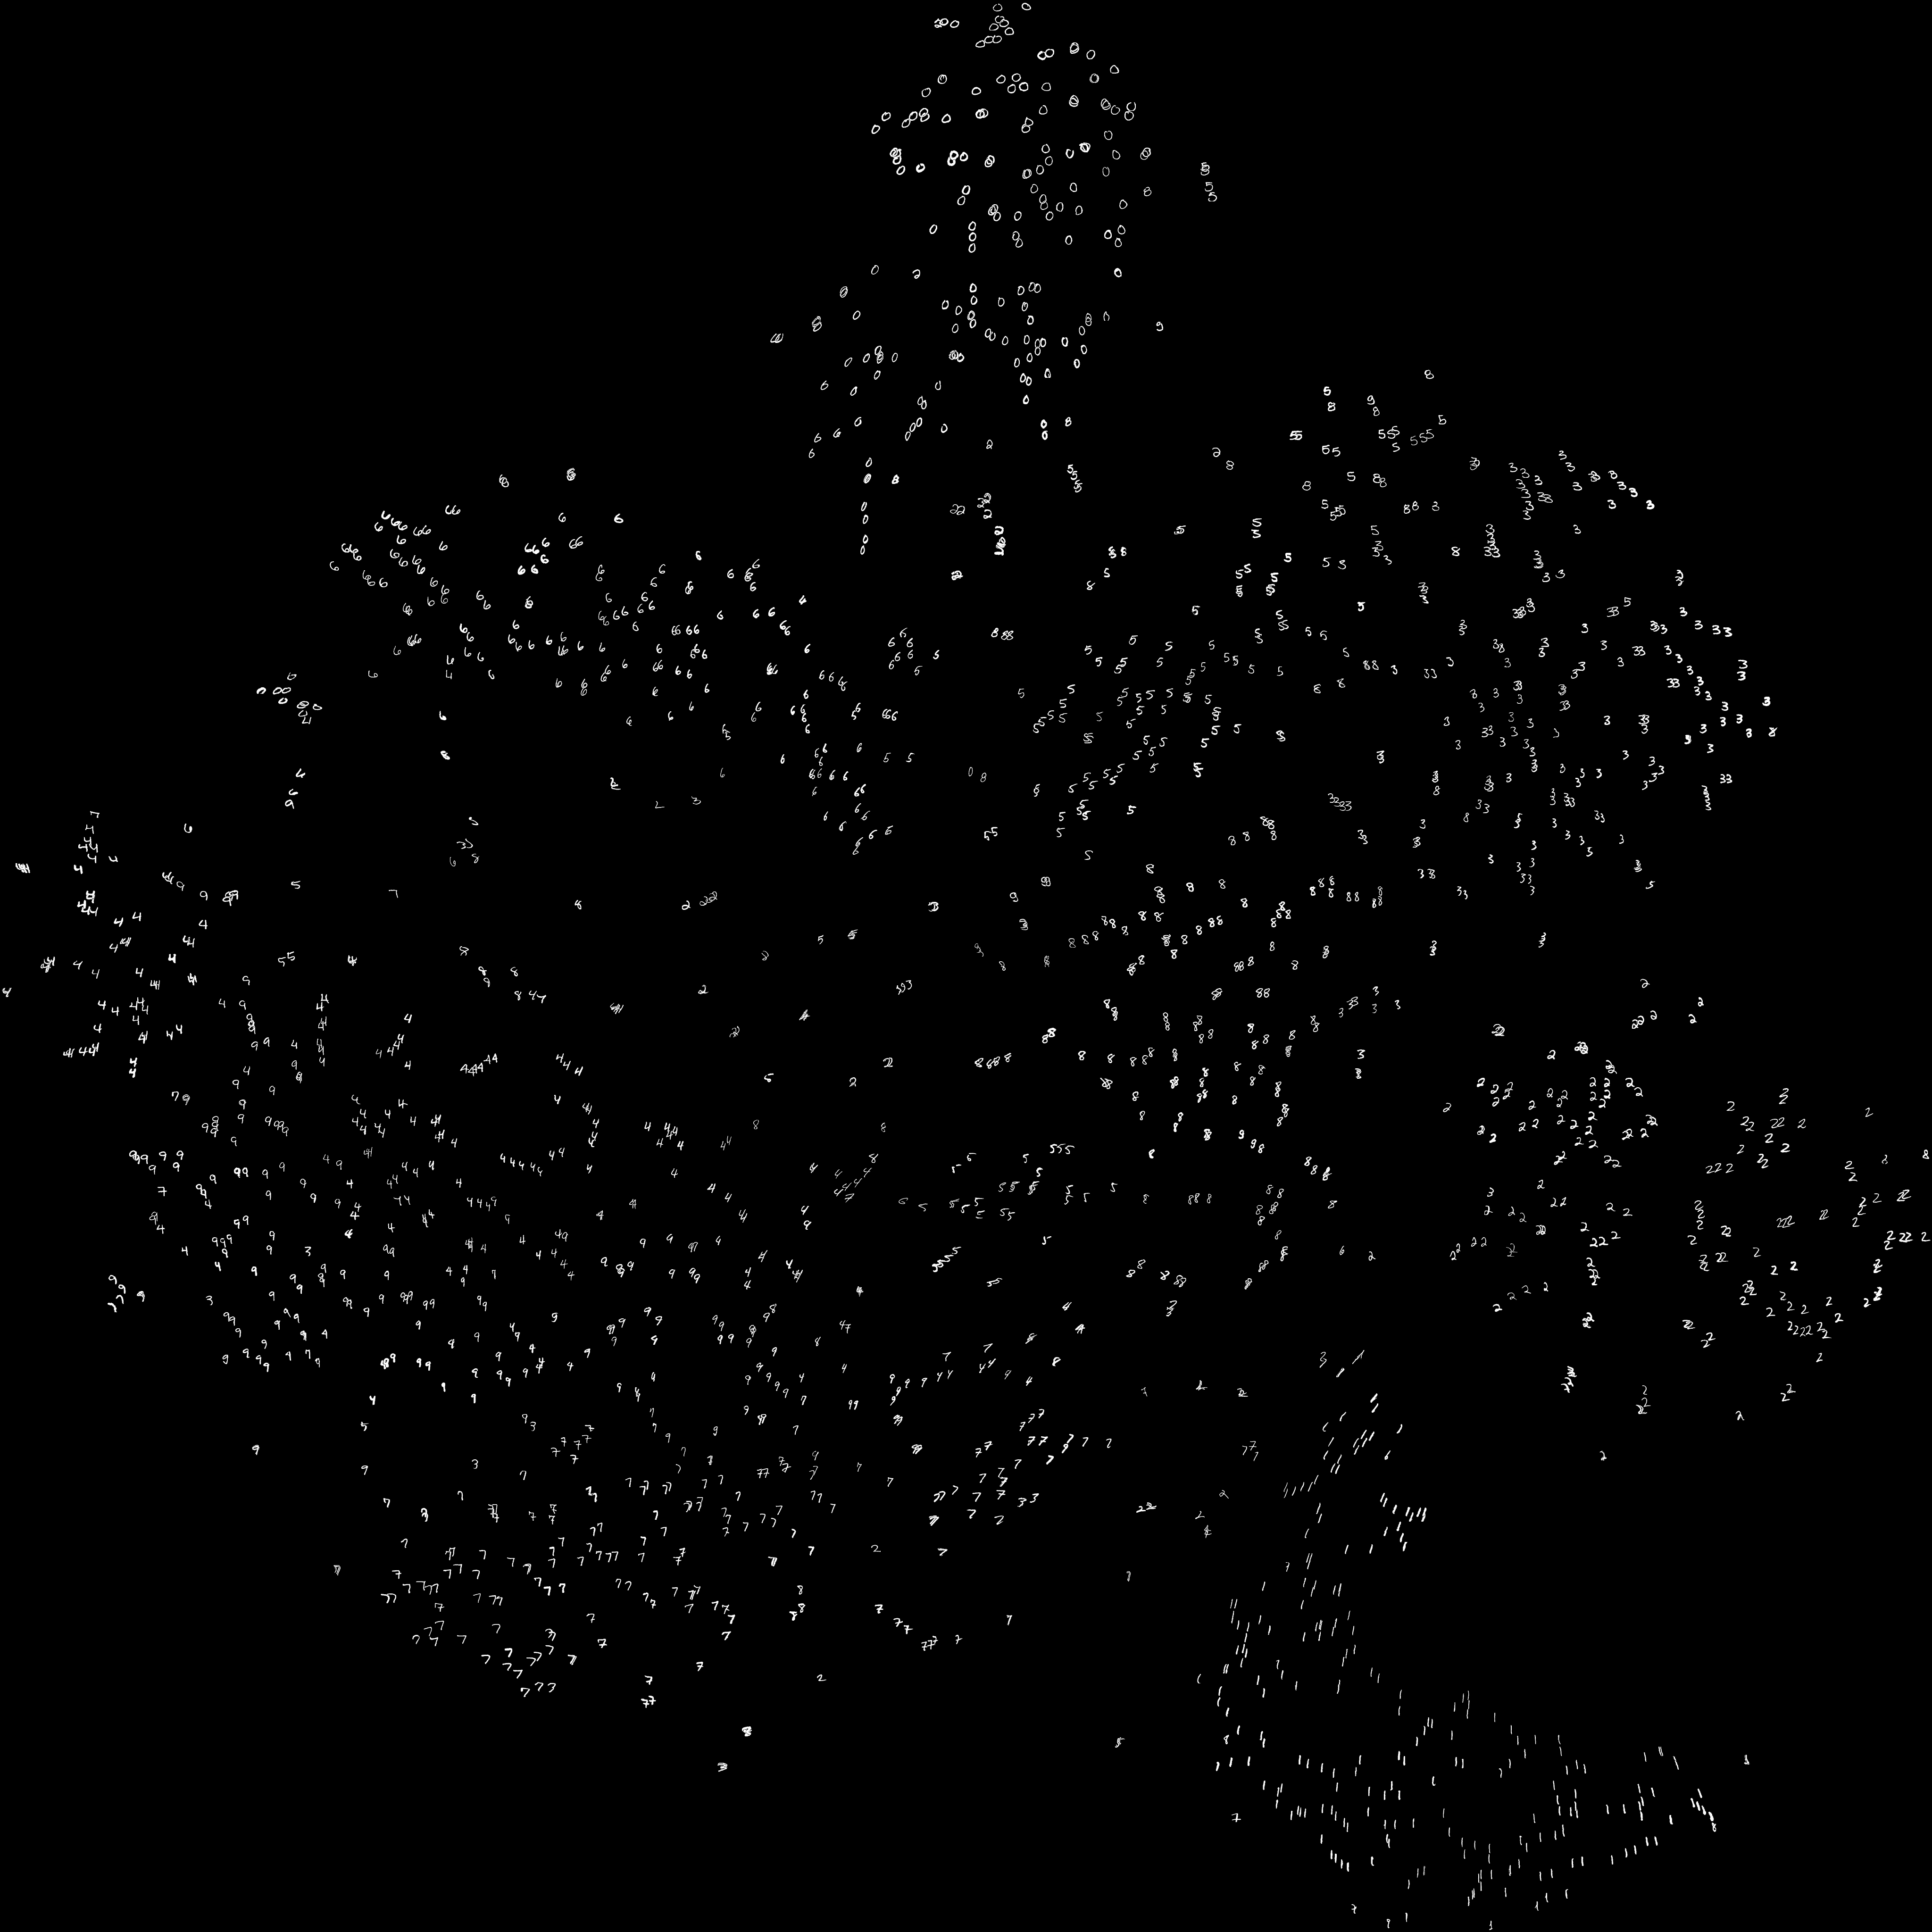

In [15]:
itorch.image(map_im)

# t-SNE Visualization of STL-10 in Torch7

In [1]:
-- module building the t-SNE map
-- ref : https://github.com/mayanks43/NYU-DL-2016/blob/master/t-SNE.ipynb

require 'nn'
require 'image'
require 'xlua'
require 'optim'
m = require 'manifold'

-- Load the data

torch.setdefaulttensortype('torch.FloatTensor')

raw_test = torch.load('stl-10/test.t7b')
datasize = 8000
testsize = 1000
channel = 3
height = 96
width = 96


In [2]:
-- parse STL-10 data from table into Tensor
function parseDataLabel(d, numSamples, numChannels, height, width)
   local t = torch.ByteTensor(numSamples, numChannels, height, width)
   local l = torch.ByteTensor(numSamples)
   local idx = 1
   for i = 1, #d do
      local this_d = d[i]
      for j = 1, #this_d do
    t[idx]:copy(this_d[j])
    l[idx] = i
    idx = idx + 1
      end
   end
   assert(idx == numSamples+1)
   return t, l
end

 -- load and parse dataset
dataset = {
	data = torch.Tensor(),
	labels = torch.Tensor(),
	size = function() return datasize end
}
dataset.data, dataset.labels = parseDataLabel(raw_test.data, datasize, channel, height, width)

In [9]:
-- only do t-SNE on 1.000 images
testset = {
	data = torch.Tensor(),
	labels = torch.Tensor(),
	size = function() return testsize end
}

-- shuffle ok ?
shuffle = torch.randperm(datasize):type('torch.LongTensor')
dataset.data = dataset.data:index(1,shuffle)
dataset.labels = dataset.labels:index(1,shuffle)

testset.data = dataset.data:narrow(1,1,testsize):float()
testset.labels = dataset.labels:narrow(1,1,testsize):float()
print("original testset: ", dataset.data:size())
print("working testset: ", testset.data:size())

original testset: 	 8000
    3
   96
   96
[torch.LongStorage of size 4]

working testset: 	 1000
    3
   96
   96
[torch.LongStorage of size 4]



x contains images: 	 1000
  288
[torch.LongStorage of size 2]

labels contains labels: 	

 1000
[torch.LongStorage of size 1]



Performing preprocessing using PCA...	


Read the 1000 x 50 data matrix successfully!
Using current time as random seed...
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
 - point 0 of 1000
Done in 0.17 seconds (sparsity = 0.135723)!
Learning embedding...
Iteration 50: error is 65.619392 (50 iterations in 0.52 seconds)
Iteration 100: error is 59.597488 (50 iterations in 0.49 seconds)
Iteration 150: error is 59.429185 (50 iterations in 0.49 seconds)
Iteration 200: error is 59.430565 (50 iterations in 0.54 seconds)
Iteration 250: error is 2.468257 (50 iterations in 0.51 seconds)
Iteration 300: error is 0.889557 (50 iterations in 0.52 seconds)
Iteration 350: error is 0.678610 (50 iterations in 0.57 seconds)
Iteration 400: error is 0.607241 (50 iterations in 0.60 seconds)
Iteration 450: error is 0.576496 (50 iterations in 0.57 seconds)
Iteration 500: error is 0.560666 (50 iterations in 0.55 seconds)
Iteration 550: error is 0.549976 (50 iterations in 0.55 seconds)
It

t-SNE embedding returns the cordinates of the images on the t-SNE maps : 	

 1000
    2
[torch.LongStorage of size 2]



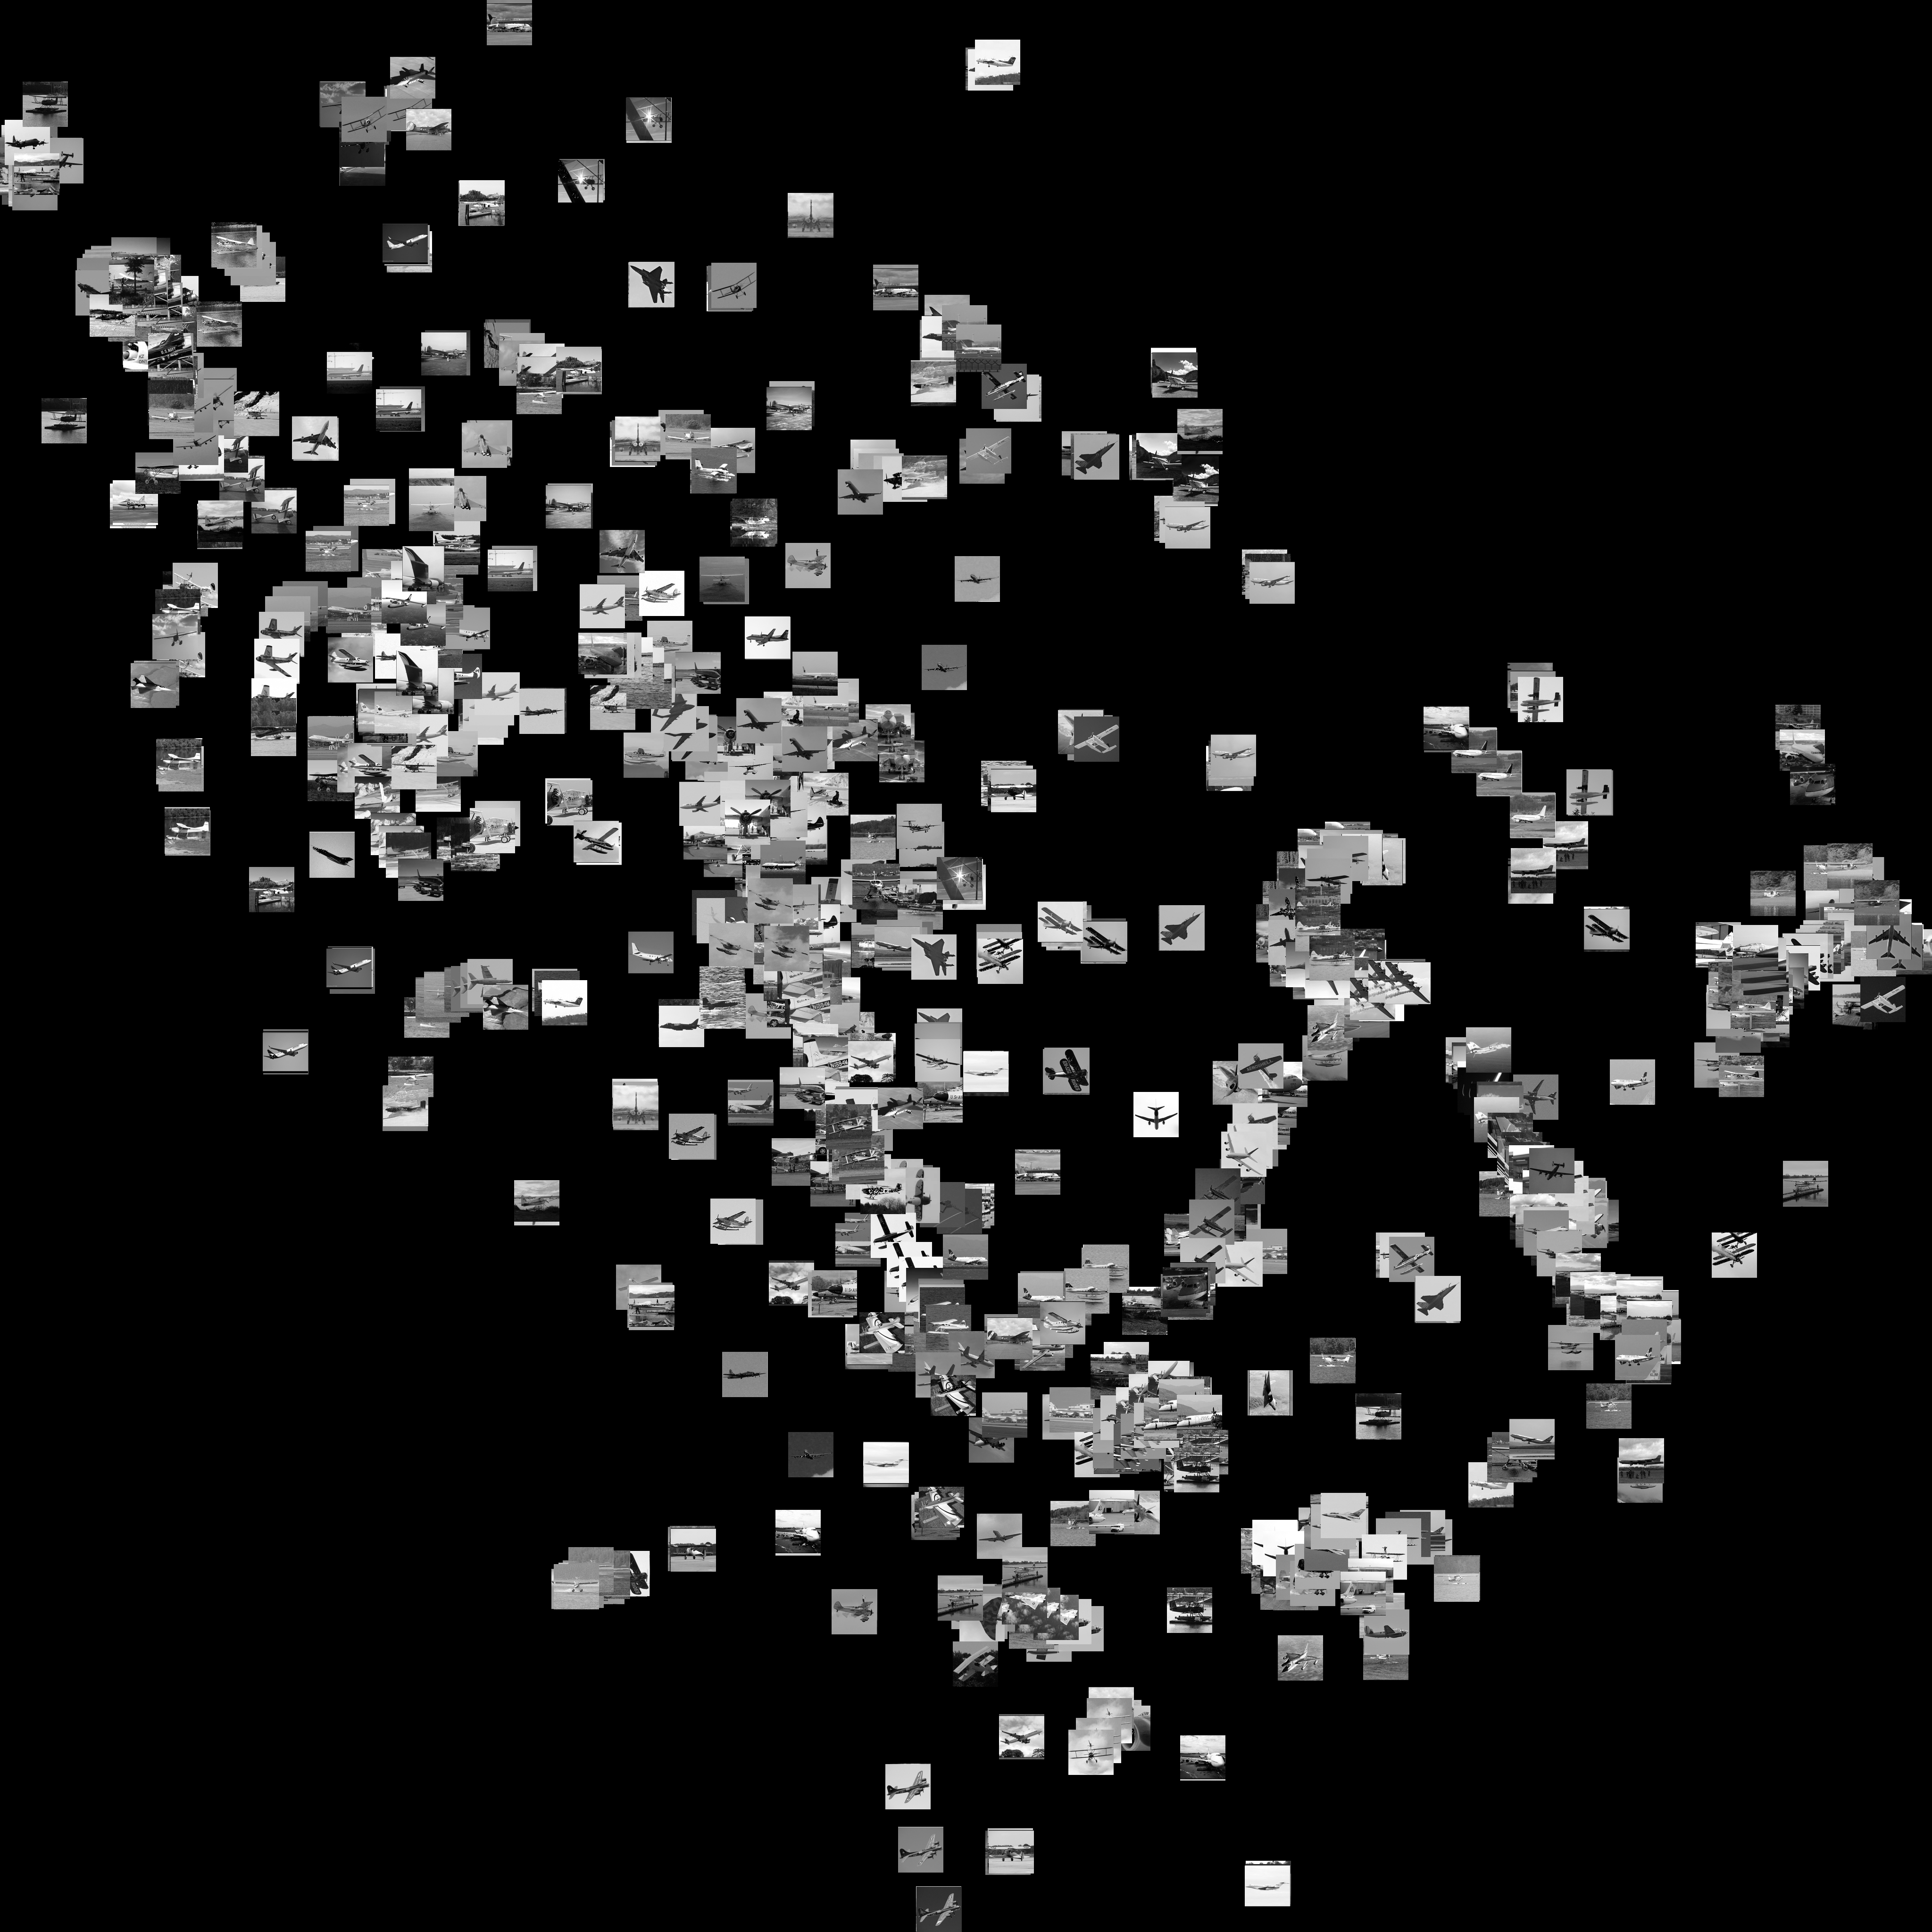

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
image.save

saves a torch.Tensor to a disk

> usage:
image.save(
    string                              -- path to file
    [torch.Tensor]                      -- tensor to save (NxHxW, N = 1 | 3)
)
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++	


...vincentchabot/torch/install/share/lua/5.1/dok/inline.lua:738: [1;31m<image.save> missing file name | tensor to save[0m
stack traceback:
	[C]: in function 'error'
	...vincentchabot/torch/install/share/lua/5.1/dok/inline.lua:738: in function 'error'
	...vincentchabot/torch/install/share/lua/5.1/image/init.lua:352: in function 'save'
	[string "-- forward the images in the model..."]:26: in main chunk
	[C]: in function 'xpcall'
	...incentchabot/torch/install/share/lua/5.1/itorch/main.lua:179: in function <...incentchabot/torch/install/share/lua/5.1/itorch/main.lua:143>
	...incentchabot/torch/install/share/lua/5.1/lzmq/poller.lua:75: in function 'poll'
	...entchabot/torch/install/share/lua/5.1/lzmq/impl/loop.lua:307: in function 'poll'
	...entchabot/torch/install/share/lua/5.1/lzmq/impl/loop.lua:325: in function 'sleep_ex'
	...entchabot/torch/install/share/lua/5.1/lzmq/impl/loop.lua:370: in function 'start'
	...incentchabot/torch/install/share/lua/5.1/itorch/main.lua:350: in main chunk
	[C]: in function 'require'
	(command line):1: in main chunk
	[C]: at 0x0100809bb0: 

In [12]:
-- forward the images in the model

x = torch.DoubleTensor(testset.data:size()):copy(testset.data)
x:resize(x:size(1), x:size(2) * x:size(3))
labels = testset.labels
print("x contains images: ", x:size())
print("labels contains labels: ", labels:size())

-- running t-SNE - generating the coordinates of the images on the t-SNE map

-- ndims - t-SNE map of 2-dimensions
-- perplexity - a learning parameter (usually between 5 and 50)
-- use_bh - Whether to use the Barnes-Hut condition described here
-- pca - t-SNE may not be fast enough for very high dimensions so we first reduce the number of dimensions to something that can be handled by t-SNE. This dimensionality reduction is done by your favorite DR algorithm PCA.
-- theta - theta of the barnes-hut condition, described in Barnes-Hut t-SNE paper

opts = {ndims = 2, perplexity = 30, pca = 50, use_bh = true, theta=0.5}
mapped_x1 = m.embedding.tsne(x, opts)
print("t-SNE embedding returns the cordinates of the images on the t-SNE maps : ", mapped_x1:size())

-- generating the image of the map
im_size = 4096
tSNE_map = m.draw_image_map(mapped_x1, x:resize(x:size(1), 1, 96, 96), im_size, 0, true)
tSNE_image = itorch.image(tSNE_map) 
file_name = "tSNE_image"
image.save(file_name, view)

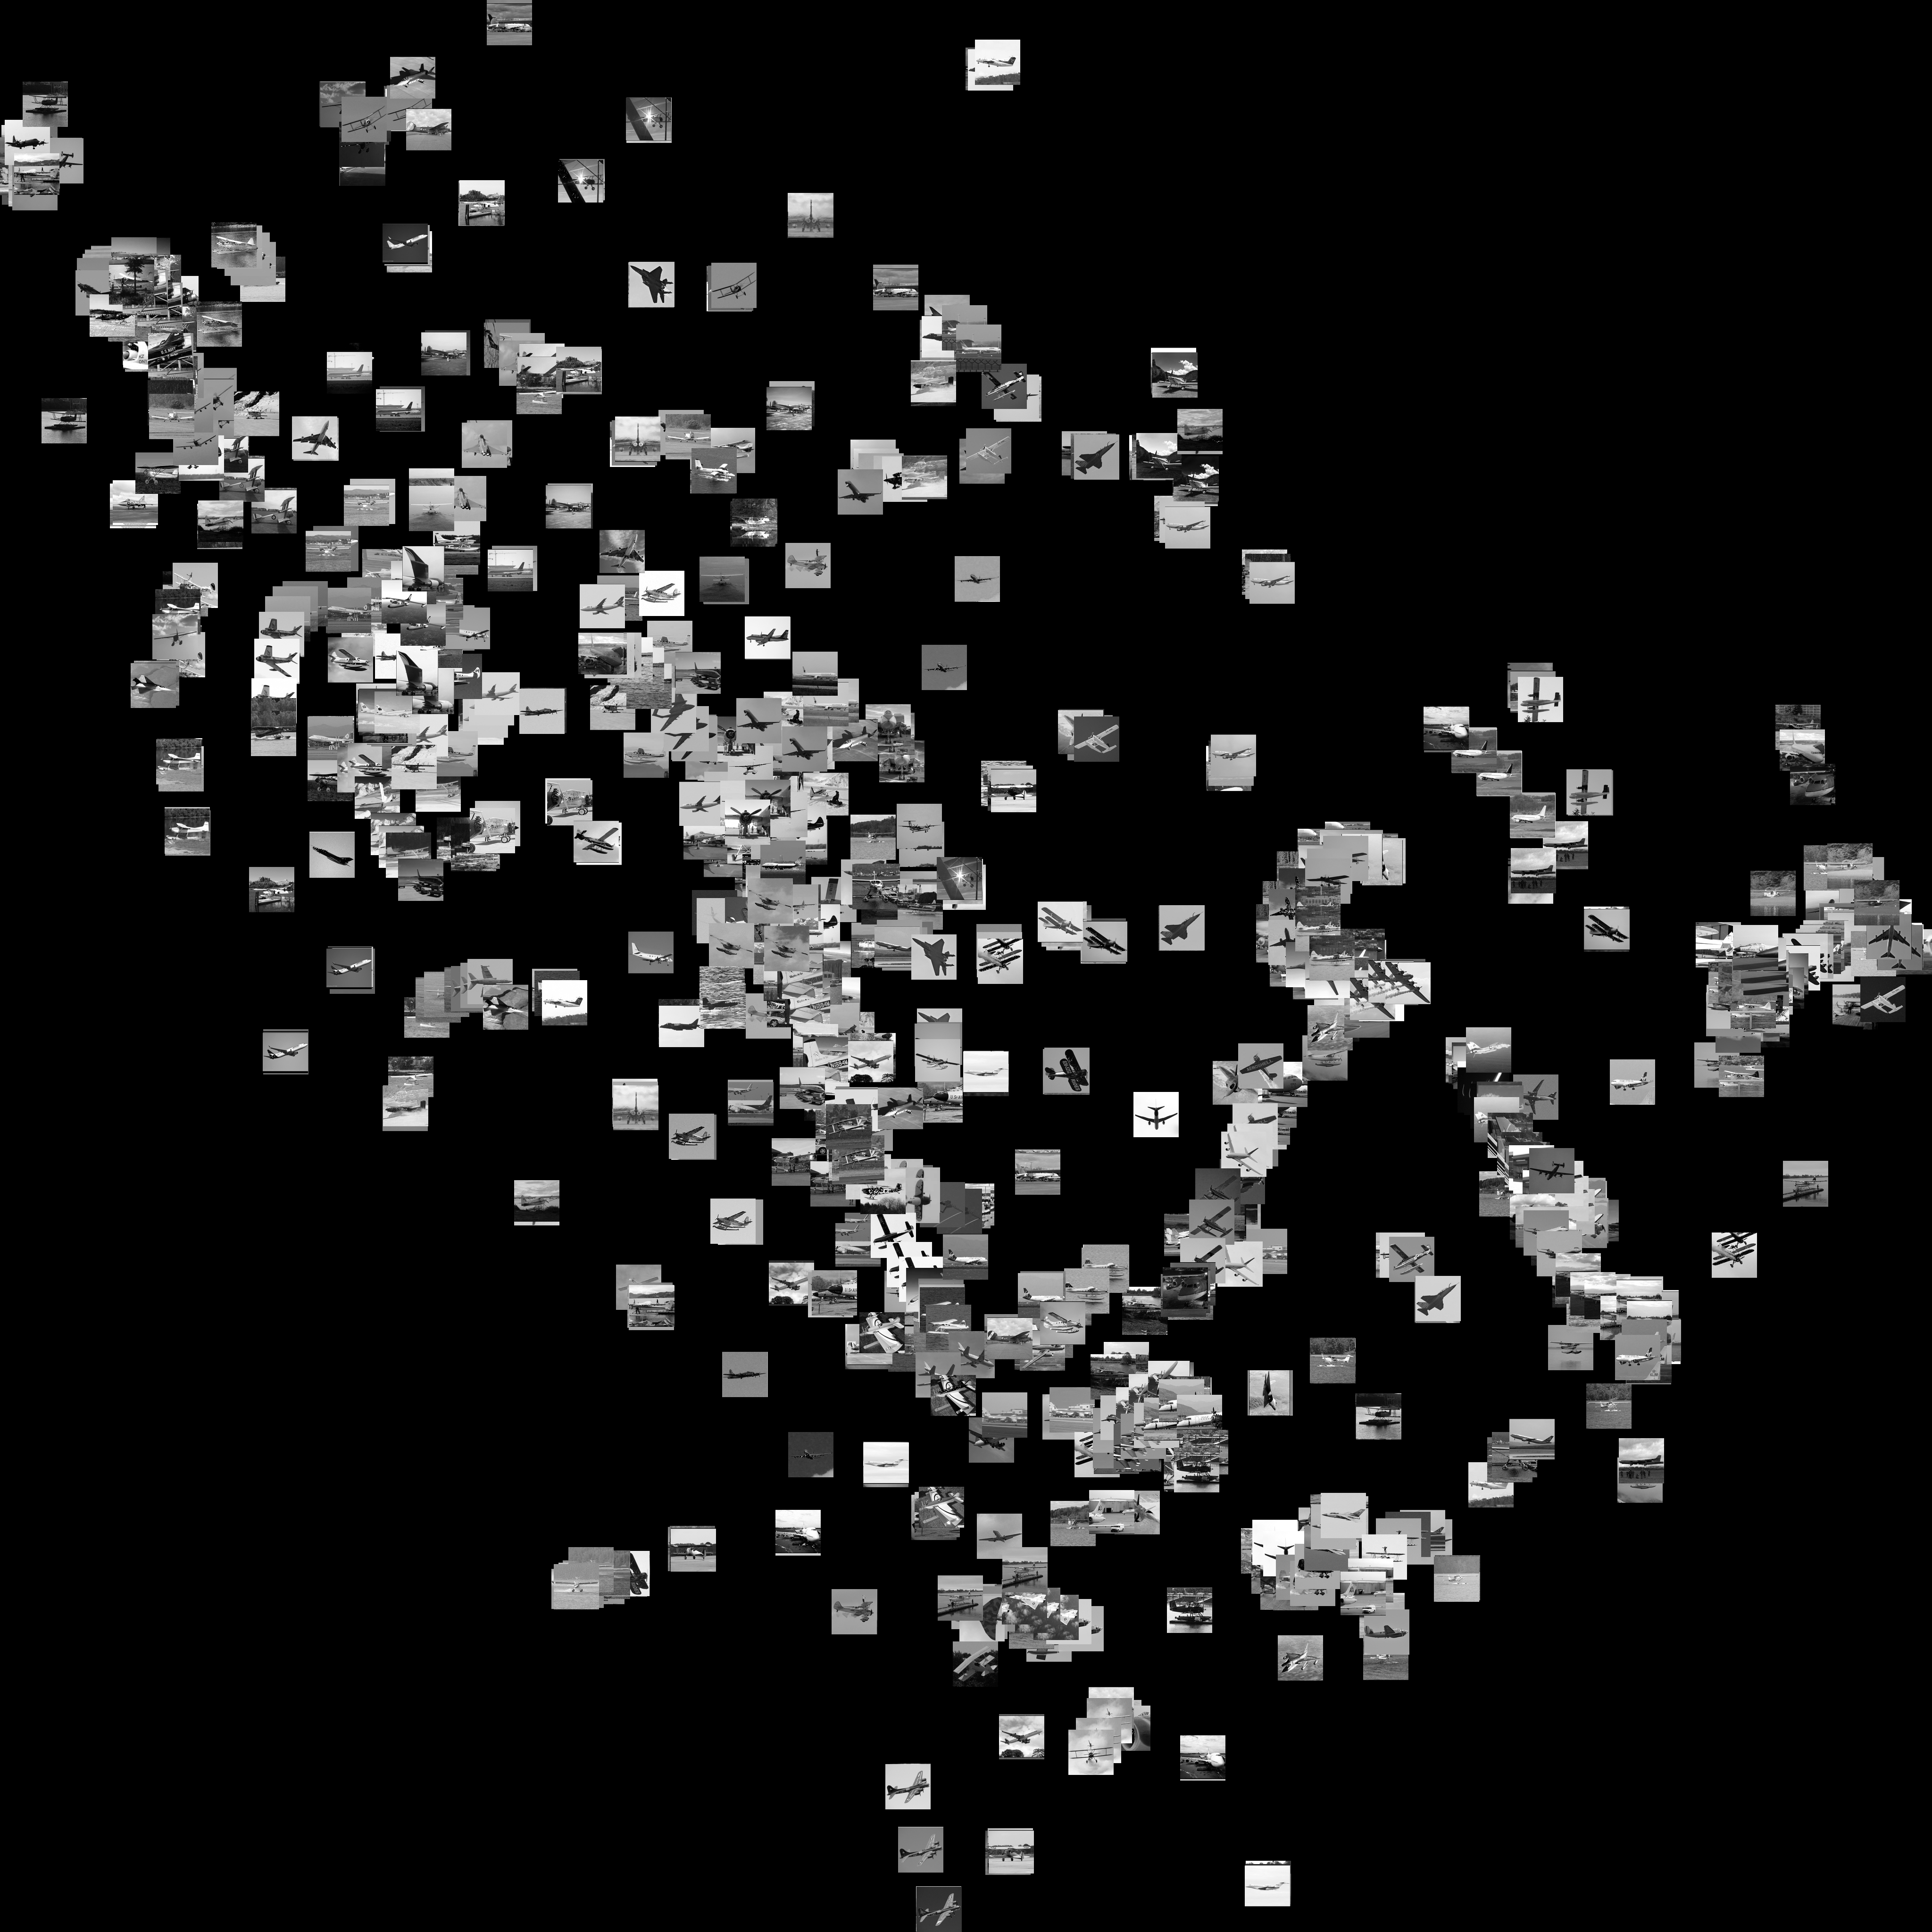

Shutting down main	


In [13]:
itorch.image(tSNE_map)